# Baseline on Combined data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train = pd.read_csv('./data/fin_comb_train_deps.csv')
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('./data/fin_comb_test_deps.csv')
X_test = X_test.drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('./data/fin_train_indeps.csv')
y_train = y_train.drop('Unnamed: 0', axis=1)
y_train = np.array(y_train)
y_test = pd.read_csv('./data/fin_test_indeps.csv')
y_test = y_test.drop('Unnamed: 0', axis=1)
y_test = np.array(y_test)

# Create a baseline model using Training Mean

In [22]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.mean(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals

# plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
# plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
# plt.show()

Mean squared error: 24.84
R2 score: -0.00


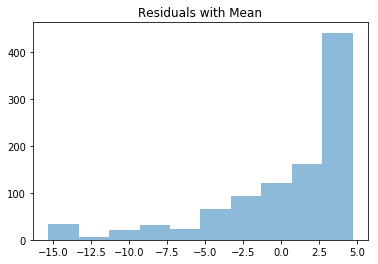

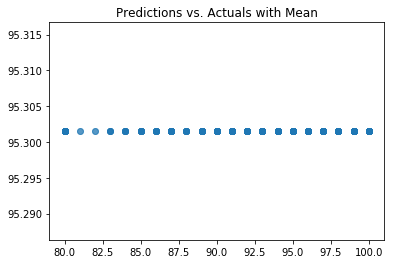

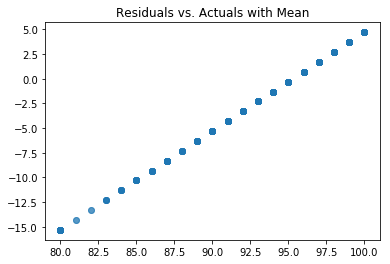

In [23]:
ys = y_test.ravel()
ys = np.random.choice(ys, 1000)
yp = y_test_baseline_pred.ravel()
yp = np.random.choice(yp, 1000)
yr = ys - yp
plt.hist(yr, alpha=0.50)
plt.title('Residuals with Mean')
plt.show()
plt.scatter(ys, yp, alpha=0.50)
plt.title('Predictions vs. Actuals with Mean')
plt.show()
plt.scatter(ys, yr, alpha=0.50)
plt.title('Residuals vs. Actuals with Mean')
plt.show()

# Create a baseline model using Training Median

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, roc_auc_score


m_train = np.median(y_train)
y_test_baseline_pred = np.array([m_train for i in range(y_test.shape[0])])


# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_test_baseline_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test.ravel(), y_test_baseline_pred.ravel()))

# Plot the residuals
# plt.scatter(y_test, y_test-y_test_baseline_pred, c='g', marker='s', alpha=0.5)
# plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), color='r')
# plt.show()

Mean squared error: 27.46
R2 score: -0.11


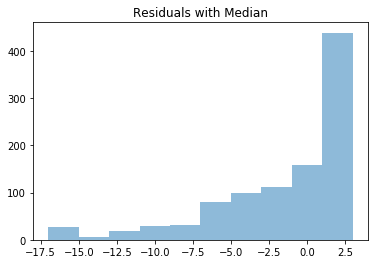

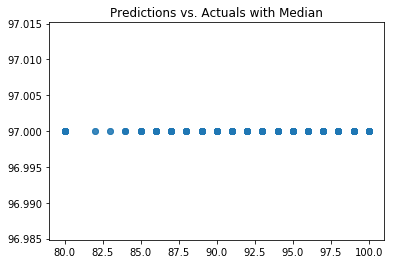

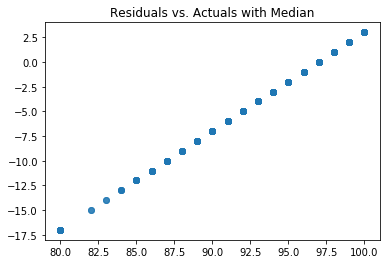

In [25]:
ys = y_test.ravel()
ys = np.random.choice(ys, 1000)
yp = y_test_baseline_pred.ravel()
yp = np.random.choice(yp, 1000)
yr = ys - yp
plt.hist(yr, alpha=0.50)
plt.title('Residuals with Median')
plt.show()
plt.scatter(ys, yp, alpha=0.50)
plt.title('Predictions vs. Actuals with Median')
plt.show()
plt.scatter(ys, yr, alpha=0.50)
plt.title('Residuals vs. Actuals with Median')
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.Lasso(alpha=0.001, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test.ravel(), y_pred.ravel()))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel()))


Mean squared error: 21.67
Variance score: 0.13


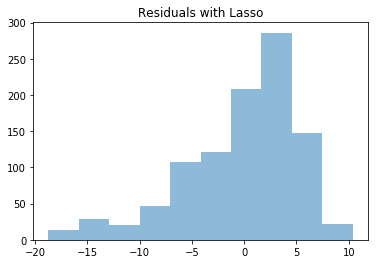

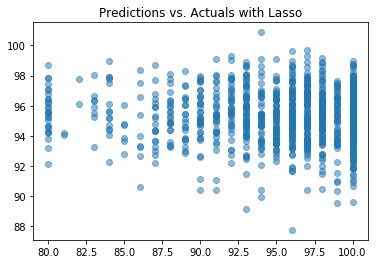

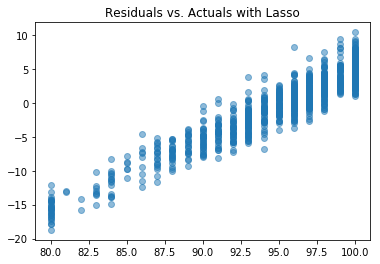

In [27]:
ys = y_test.ravel()
ys = np.random.choice(ys, 1000)
yp = y_pred.ravel()
yp = np.random.choice(yp, 1000)
yr = ys - yp
plt.hist(yr, alpha=0.50)
plt.title('Residuals with Lasso')
plt.show()
plt.scatter(ys, yp, alpha=0.50)
plt.title('Predictions vs. Actuals with Lasso')
plt.show()
plt.scatter(ys, yr, alpha=0.50)
plt.title('Residuals vs. Actuals with Lasso')
plt.show()

# Check for endogeneity

In [4]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [13]:
np.random.seed(1234)
idxs = np.random.randint(0, y_train.shape[0], 5000)
idxs = idxs.ravel()

X_t = X_train.loc[idxs]
print X_t.shape
y_t = y_train.loc[idxs]
y_t = np.array(y_t)
print y_t.shape

(5000, 195)
(5000, 1)


In [18]:
X_t.columns

Index([u'bathrooms', u'bedrooms', u'beds', u'cleaning_fee', u'guests_included',
       u'host_listings_count', u'host_acceptance_rate', u'host_response_rate',
       u'host_has_profile_pic', u'host_identity_verified',
       ...
       u'amenities_smartlock', u'amenities_smokedetector',
       u'amenities_smokingallowed', u'amenities_suitableforevents',
       u'amenities_translationmissingenhostingamenity', u'amenities_tv',
       u'amenities_washer', u'amenities_wheelchairaccessible',
       u'amenities_wifi', u'amenities_wirelessinternet'],
      dtype='object', length=195)

In [14]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.001, fit_intercept=True, max_iter=10000)
regr.fit(X_t, y_t)
y_train_error = regr.predict(X_t) - y_t

In [22]:
for cname, c in zip(X_train.columns, X_t):
    print X_t[c].values
    print '%s: correlation coef: %s' % (cname, np.corrcoef(X_t[c].values, y_train_error.ravel())[1, 0])
    plt.scatter(c.ravel(), y_train_error.ravel(), alpha=0.25)
    plt.show()
    

[0.25 0.25 0.25 ... 0.25 0.25 0.25]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [22]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR


kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1234)


def build_model(model_name):
    return model_name()

for model_name in [LinearRegression, Ridge, ElasticNet, \
                   AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor]:
    
    model = build_model(model_name)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print model_name, results.mean()
    

<class 'sklearn.linear_model.base.LinearRegression'> -0.9653514134368019
<class 'sklearn.linear_model.ridge.Ridge'> -0.9653502303742465
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> -1.0006583133035734
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'> -1.0118290310746814
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> -0.9297750077517819
<class 'sklearn.ensemble.forest.RandomForestRegressor'> -1.009561448194089


degree is: 2
Mean squared error: 0.95
r2 score: 0.07
explained variance score: 0.07


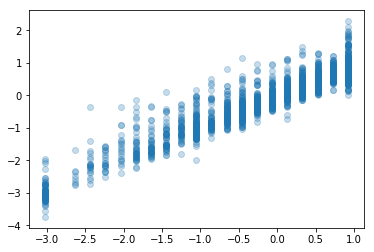

degree is: 3
Mean squared error: 1.13
r2 score: -0.11
explained variance score: -0.11


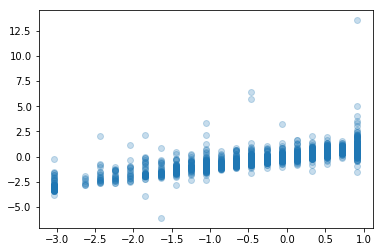

degree is: 4
Mean squared error: 26.54
r2 score: -24.96
explained variance score: -24.94


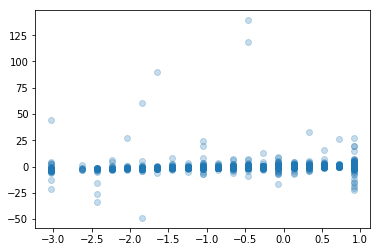

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score


degrees = [2, 3, 4]


for d in degrees:

    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=True, interaction_only=False)
    linear_regression = linear_model.Ridge(normalize=False, alpha=0.1, max_iter=10000)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # The degree 
    print 'degree is: %s' % d
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('r2 score: %.2f' % r2_score(y_test.tolist(), y_pred.tolist()))
    
    # Explained variance score: 1 is perfect prediction
    print('explained variance score: %.2f' % explained_variance_score(y_test.tolist(), y_pred.tolist()))   
    plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
    plt.show()

Mean squared error: 0.94
r2 score: 0.08
explained variance score: 0.08


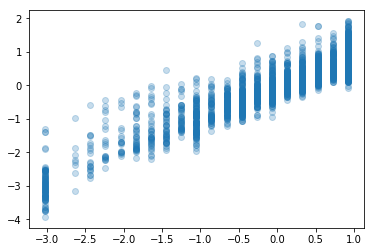

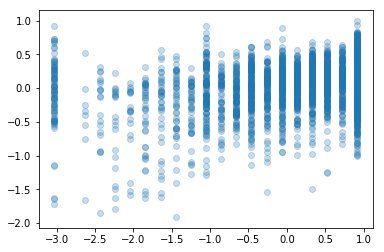

In [24]:
import xgboost


xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, 
                          subsample=0.5, colsample_bytree=0.5, max_depth=15, 
                          objective='reg:linear')

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()

Mean squared error: 0.93
r2 score: 0.09
explained variance score: 0.09


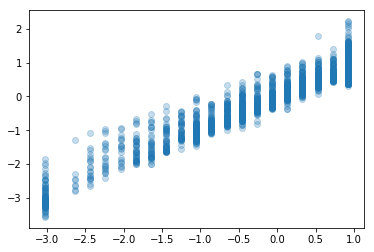

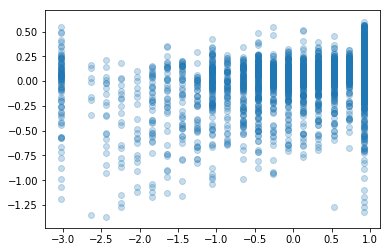

In [25]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, subsample=0.75, max_depth=15)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2 score: %.2f' % r2_score(y_test.ravel(), y_pred.ravel(),))

# Explained variance score: 1 is perfect prediction
print('explained variance score: %.2f' % explained_variance_score(y_test.ravel(), y_pred.ravel()))   
plt.scatter(y_test.tolist(), (y_test-y_pred).tolist(), alpha=0.25)
plt.show()

plt.scatter(y_test, y_pred, alpha=0.25)
plt.show()